In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/train.csv')
df.drop(['index','occyp_type'], axis = 1, inplace = True)
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


In [3]:
df.gender = df.gender.replace({'F' : 0, 'M' : 1})
df.car = df.car.replace({'N' : 0, 'Y' : 1})
df.reality = df.reality.replace({'N' : 0, 'Y' : 1})
df.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0


In [4]:
df['age'] = df.DAYS_BIRTH.apply(lambda x : -x // 365)
df.DAYS_EMPLOYED = (-1) * df.DAYS_EMPLOYED 
df.loc[(df.DAYS_EMPLOYED < 0), 'DAYS_EMPLOYED'] = 0
df.begin_month = (-1) * df.begin_month

# income_total에 로그스케일 적용
df.income_total = np.log1p(df.income_total)

In [5]:
y = df.credit
X = df.drop(['credit', 'DAYS_BIRTH'], axis = 1)

In [6]:
X

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,age
0,0,0,0,0,12.218500,Commercial associate,Higher education,Married,Municipal apartment,4709,1,0,0,0,2.0,6.0,38
1,0,0,1,1,12.419170,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1540,1,0,0,1,3.0,5.0,31
2,1,1,1,0,13.017005,Working,Higher education,Married,House / apartment,4434,1,0,1,0,2.0,22.0,52
3,0,0,1,0,12.218500,Commercial associate,Secondary / secondary special,Married,House / apartment,2092,1,0,1,0,2.0,37.0,41
4,0,1,1,0,11.967187,State servant,Higher education,Married,House / apartment,2105,1,0,0,0,2.0,26.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,12.323860,State servant,Secondary / secondary special,Married,House / apartment,1984,1,0,0,0,4.0,2.0,33
26453,0,0,1,1,12.100718,Working,Higher education,Separated,House / apartment,2475,1,0,0,0,2.0,47.0,41
26454,0,1,0,0,12.586223,Working,Secondary / secondary special,Civil marriage,With parents,2015,1,0,0,0,2.0,25.0,27
26455,1,0,1,0,12.049425,Working,Incomplete higher,Single / not married,House / apartment,107,1,0,0,0,1.0,59.0,27


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
numeric_features = ['child_num', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'age']
numeric_transformer = StandardScaler()

categorical_features = ['income_type', 'edu_type', 'family_type', 'house_type']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown = 'ignore')

# label_features = ['credit']
# label_transformer = LabelEncoder()

preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], remainder='passthrough'
                )

In [9]:
preprocessor.fit(X_train)
scaled_X_train = preprocessor.transform(X_train)
scaled_X_test = preprocessor.transform(X_test)

## scaled_X_train, y_train 으로 학습
## scaled_X_test, y_test 로 예측

In [18]:
scaled_X_train = pd.DataFrame(scaled_X_train)
scaled_X_test = pd.DataFrame(scaled_X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

## Modeling

In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing

In [20]:
model = models.Sequential()

# 1-hidden layer
model.add(layers.Dense(input_dim=34, units=256, activation=None, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.5))

# 2-hidden layer
model.add(layers.Dense(units=256, activation=None, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.5))

# Output layer
model.add(layers.Dense(units=3, activation='softmax'))
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               8960      
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)              

In [21]:
history = model.fit(scaled_X_train, y_train, batch_size=100, epochs=300, validation_split=0.3)

Epoch 1/300
149/149 [==============================] - 1s 5ms/step - loss: 1.0902 - categorical_accuracy: 0.5660 - val_loss: 0.8829 - val_categorical_accuracy: 0.6471
Epoch 2/300
149/149 [==============================] - 1s 3ms/step - loss: 0.9520 - categorical_accuracy: 0.6138 - val_loss: 0.8963 - val_categorical_accuracy: 0.6614
Epoch 3/300
149/149 [==============================] - 1s 4ms/step - loss: 0.9050 - categorical_accuracy: 0.6323 - val_loss: 0.8955 - val_categorical_accuracy: 0.6591
Epoch 4/300
149/149 [==============================] - 1s 5ms/step - loss: 0.8806 - categorical_accuracy: 0.6417 - val_loss: 0.8789 - val_categorical_accuracy: 0.6731
Epoch 5/300
149/149 [==============================] - 1s 4ms/step - loss: 0.8735 - categorical_accuracy: 0.6445 - val_loss: 0.8681 - val_categorical_accuracy: 0.6735
Epoch 6/300
149/149 [==============================] - 1s 5ms/step - loss: 0.8651 - categorical_accuracy: 0.6504 - val_loss: 0.8714 - val_categorical_accuracy: 0.672

Epoch 50/300
149/149 [==============================] - 2s 11ms/step - loss: 0.8044 - categorical_accuracy: 0.6815 - val_loss: 0.8201 - val_categorical_accuracy: 0.6874
Epoch 51/300
149/149 [==============================] - 2s 11ms/step - loss: 0.8053 - categorical_accuracy: 0.6801 - val_loss: 0.8172 - val_categorical_accuracy: 0.6880
Epoch 52/300
149/149 [==============================] - 1s 7ms/step - loss: 0.8048 - categorical_accuracy: 0.6796 - val_loss: 0.8245 - val_categorical_accuracy: 0.6764
Epoch 53/300
149/149 [==============================] - 1s 4ms/step - loss: 0.8055 - categorical_accuracy: 0.6799 - val_loss: 0.8209 - val_categorical_accuracy: 0.6883
Epoch 54/300
149/149 [==============================] - 1s 4ms/step - loss: 0.8042 - categorical_accuracy: 0.6820 - val_loss: 0.8177 - val_categorical_accuracy: 0.6872
Epoch 55/300
149/149 [==============================] - 1s 10ms/step - loss: 0.8056 - categorical_accuracy: 0.6797 - val_loss: 0.8163 - val_categorical_accura

Epoch 99/300
149/149 [==============================] - 1s 8ms/step - loss: 0.7664 - categorical_accuracy: 0.6927 - val_loss: 0.8145 - val_categorical_accuracy: 0.6910
Epoch 100/300
149/149 [==============================] - 1s 5ms/step - loss: 0.7670 - categorical_accuracy: 0.6914 - val_loss: 0.8210 - val_categorical_accuracy: 0.6902
Epoch 101/300
149/149 [==============================] - 2s 10ms/step - loss: 0.7666 - categorical_accuracy: 0.6902 - val_loss: 0.8203 - val_categorical_accuracy: 0.6917
Epoch 102/300
149/149 [==============================] - 1s 6ms/step - loss: 0.7668 - categorical_accuracy: 0.6912 - val_loss: 0.8167 - val_categorical_accuracy: 0.6928
Epoch 103/300
149/149 [==============================] - 1s 6ms/step - loss: 0.7693 - categorical_accuracy: 0.6886 - val_loss: 0.8142 - val_categorical_accuracy: 0.6921
Epoch 104/300
149/149 [==============================] - 1s 6ms/step - loss: 0.7641 - categorical_accuracy: 0.6900 - val_loss: 0.8140 - val_categorical_acc

149/149 [==============================] - 1s 4ms/step - loss: 0.7418 - categorical_accuracy: 0.6950 - val_loss: 0.8216 - val_categorical_accuracy: 0.6891
Epoch 148/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7424 - categorical_accuracy: 0.6993 - val_loss: 0.8199 - val_categorical_accuracy: 0.6869
Epoch 149/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7472 - categorical_accuracy: 0.6957 - val_loss: 0.8204 - val_categorical_accuracy: 0.6906
Epoch 150/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7445 - categorical_accuracy: 0.6968 - val_loss: 0.8194 - val_categorical_accuracy: 0.6910
Epoch 151/300
149/149 [==============================] - 1s 8ms/step - loss: 0.7455 - categorical_accuracy: 0.6955 - val_loss: 0.8216 - val_categorical_accuracy: 0.6928
Epoch 152/300
149/149 [==============================] - 1s 6ms/step - loss: 0.7426 - categorical_accuracy: 0.6940 - val_loss: 0.8188 - val_categorical_accuracy: 0.6924


149/149 [==============================] - 1s 4ms/step - loss: 0.7288 - categorical_accuracy: 0.7006 - val_loss: 0.8180 - val_categorical_accuracy: 0.6951
Epoch 196/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7230 - categorical_accuracy: 0.7014 - val_loss: 0.8240 - val_categorical_accuracy: 0.6902
Epoch 197/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7240 - categorical_accuracy: 0.7043 - val_loss: 0.8257 - val_categorical_accuracy: 0.6902
Epoch 198/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7266 - categorical_accuracy: 0.7011 - val_loss: 0.8208 - val_categorical_accuracy: 0.6901
Epoch 199/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7303 - categorical_accuracy: 0.6999 - val_loss: 0.8217 - val_categorical_accuracy: 0.6890
Epoch 200/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7283 - categorical_accuracy: 0.7003 - val_loss: 0.8222 - val_categorical_accuracy: 0.6902


149/149 [==============================] - 1s 9ms/step - loss: 0.7174 - categorical_accuracy: 0.7019 - val_loss: 0.8181 - val_categorical_accuracy: 0.6885
Epoch 244/300
149/149 [==============================] - 1s 6ms/step - loss: 0.7175 - categorical_accuracy: 0.7050 - val_loss: 0.8216 - val_categorical_accuracy: 0.6869
Epoch 245/300
149/149 [==============================] - 1s 6ms/step - loss: 0.7204 - categorical_accuracy: 0.7046 - val_loss: 0.8198 - val_categorical_accuracy: 0.6880
Epoch 246/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7232 - categorical_accuracy: 0.7018 - val_loss: 0.8229 - val_categorical_accuracy: 0.6896
Epoch 247/300
149/149 [==============================] - 1s 7ms/step - loss: 0.7178 - categorical_accuracy: 0.7020 - val_loss: 0.8231 - val_categorical_accuracy: 0.6902
Epoch 248/300
149/149 [==============================] - 1s 5ms/step - loss: 0.7155 - categorical_accuracy: 0.7035 - val_loss: 0.8188 - val_categorical_accuracy: 0.6869


149/149 [==============================] - 1s 9ms/step - loss: 0.7088 - categorical_accuracy: 0.7093 - val_loss: 0.8162 - val_categorical_accuracy: 0.6863
Epoch 292/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7177 - categorical_accuracy: 0.7011 - val_loss: 0.8213 - val_categorical_accuracy: 0.6890
Epoch 293/300
149/149 [==============================] - 1s 4ms/step - loss: 0.7081 - categorical_accuracy: 0.7069 - val_loss: 0.8171 - val_categorical_accuracy: 0.6874
Epoch 294/300
149/149 [==============================] - 1s 9ms/step - loss: 0.7076 - categorical_accuracy: 0.7065 - val_loss: 0.8206 - val_categorical_accuracy: 0.6876
Epoch 295/300
149/149 [==============================] - 1s 9ms/step - loss: 0.7107 - categorical_accuracy: 0.7071 - val_loss: 0.8217 - val_categorical_accuracy: 0.6847
Epoch 296/300
149/149 [==============================] - 1s 6ms/step - loss: 0.7033 - categorical_accuracy: 0.7085 - val_loss: 0.8216 - val_categorical_accuracy: 0.6830


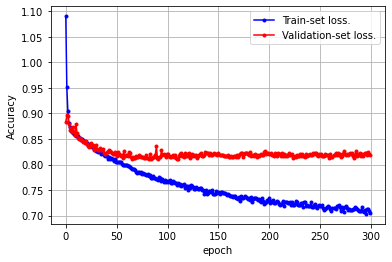

In [22]:
val_loss = history.history['val_loss']
loss = history.history['loss']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(loss)) # x축 좌표를 손으로 만들어준거야 / arange : array of range
plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()